In [1]:
# 얼굴인식(얼굴정보)-세로*가로*3 넘파이 -> 1*512(임베딩데이터로 변환) -> X, y를 머신러닝(SVM)

# 1. 데이터 셋 다운로드 및 압축해제
- https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset?resource=download

In [2]:
!unzip data/5celebrity.zip -d data/5celebrity/


^C


# 2. 얼굴 Detect

In [3]:
!pip install mtcnn

In [42]:
from mtcnn import MTCNN
from keras_facenet import FaceNet
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2.1 MTCNN을 이용해서 얼굴 형태 탐지

In [23]:
detector = MTCNN()
image = cv2.imread('data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg',cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

[{'box': [14, 30, 76, 92],
  'confidence': 0.9998857975006104,
  'keypoints': {'nose': [36, 91],
   'mouth_right': [64, 98],
   'right_eye': [51, 63],
   'left_eye': [27, 75],
   'mouth_left': [44, 109]}}]

## 2-2 탐지한 얼굴 그려보기

In [6]:
box = result[0]['box'] # 왼쪽위부분의 x,y,width,height
keypoints= result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye,left_eye,mouth_left
cv2.rectangle(image,
              (box[0],box[1]),# 사각형 왼쪽 윗부분 좌표
              (box[0]+box[2],box[1]+box[3]), # 사각형 오른쪽 밑부분 좌표
              (0,155,255),
              2)
cv2.circle(image,keypoints['nose'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_right'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_left'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['right_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['left_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.imwrite('data/ben.jpg',cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

True

In [7]:
box = result[0]['box'] # 왼쪽위부분의 x,y,width,height
x,y,w,h=box
keypoints= result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye,left_eye,mouth_left
cv2.rectangle(image,
              (x,y),# 사각형 왼쪽 윗부분 좌표
              (x+w,y+h), # 사각형 오른쪽 밑부분 좌표
              (0,155,255),
              2)
cv2.circle(image,keypoints['nose'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_right'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_left'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['right_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['left_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.imwrite('data/ben.jpg',cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

face= image[y:y+h,x:x+w]
cv2.imwrite('data/benface.jpg',cv2.cvtColor(face,cv2.COLOR_RGB2BGR))

True

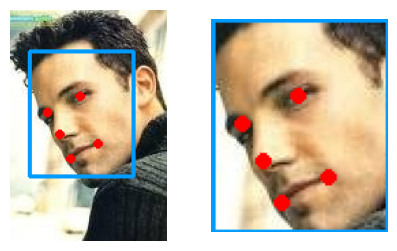

In [8]:
fig, axes = plt.subplots(1,2,figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

In [9]:
detector = MTCNN()
image = cv2.imread('data/5celebrity/train/elton_john/12.jpg',cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

[{'box': [121, 69, 66, 83],
  'confidence': 0.9964280724525452,
  'keypoints': {'nose': [156, 121],
   'mouth_right': [170, 130],
   'right_eye': [169, 100],
   'left_eye': [139, 101],
   'mouth_left': [141, 131]}}]

In [10]:
box = result[0]['box'] # 왼쪽위부분의 x,y,width,height
x,y,w,h=box
keypoints= result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye,left_eye,mouth_left
cv2.rectangle(image,
              (x,y),# 사각형 왼쪽 윗부분 좌표
              (x+w,y+h), # 사각형 오른쪽 밑부분 좌표
              (0,155,255),
              2)
cv2.circle(image,keypoints['nose'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_right'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['mouth_left'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['right_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.circle(image,keypoints['left_eye'],
          2, # 반지름
          (255,0,0),
           2
          )
cv2.imwrite('data/john.jpg',cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

face= image[y:y+h,x:x+w]
cv2.imwrite('data/johnface.jpg',cv2.cvtColor(face,cv2.COLOR_RGB2BGR))

True

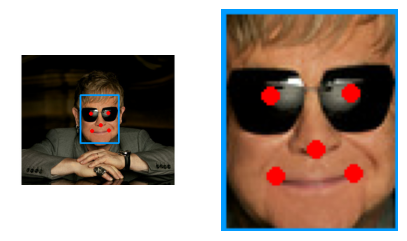

In [11]:
fig, axes = plt.subplots(1,2,figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

## 2.3 입력형식에 맞게 차원변환

In [12]:
face.shape

(83, 66, 3)

In [13]:
face_data = np.expand_dims(face,axis=0)
face_data= face[np.newaxis,:]
face_data.shape

(1, 83, 66, 3)

 # 3. Facenet을 활용하여 임베딩 데이터로 변환(face_data를)
 - face_data: 1x83x66x3
 - 임베딩 데이터 : 1x 512 

In [14]:
! pip install keras-facenet

In [15]:
from keras_facenet import FaceNet
model = FaceNet()


## 3-1 이미지데이터를 FaceNet 임베딩 데이터로 변환

In [16]:
# face_data 얼굴 이미지 이거나 얼굴 특징 데이터가 있는 이미지를 유사성을 측정할 수 있는 1x512 배열
face_embedding = model.embeddings(face_data)
face_embedding.shape

1/1 [==============================] - 4s 4s/step


(1, 512)

In [17]:
face_embedding[0,:10]

array([-0.00535406,  0.03481748,  0.06170098,  0.12021632,  0.00196333,
        0.04806108, -0.07896575, -0.04746441, -0.0599184 , -0.02178188],
      dtype=float32)

# 4. 분류모델을 만들기 위해서 데이터셋 생성
- X_train(nx512),y_train(n) * n은 train 폴더안의 사진 갯수
- X_test(mx512), y_test(m) * m은 test 폴더안의 사진 갯수

## 4-1 y_train(사람이름)과 x_train에 사용될 이미지 경로(x_train_path)
- y_test(사람이름)과 X_test에 사용될 이미지 경로 (x_test_path)

In [18]:
import os 
train_path= 'data/5celebrity/train'
test_path = 'data/5celebrity/val'


In [19]:
list(os.walk(train_path))

[('data/5celebrity/train',
  ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'],
  []),
 ('data/5celebrity/train\\ben_afflek',
  [],
  ['httpcsvkmeuaeccjpg.jpg',
   'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg',
   'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg',
   'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg',
   'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg',
   'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg',
   'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg',
   'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg',
   'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg',
   'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg',
   'httpwwwallposterscomimagesPostersPFjpg.jpg',
   'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg',
   'httpwwwhillsindcomstorebenjpg.jpg',
   'httpwwwrumenewscomwpcontentup

In [20]:
def get_path(path):
    x_path = []
    y= []
    for x in os.walk(path):
        if len(x[2])==0:
            print(x,'에는 파일이 없네요')
            continue
        name = os.path.basename(x[0])
        print(name,'사진',len(x[2]),'장 parsing 중')
        for file_name in x[2]:
            image_full_path = path+'/'+name+'/' + file_name
            x_path.append(image_full_path)
            y.append(name)
#     print(len(y))        
#     print(len(x_path))
#     for name, path in zip(y,x_path):
#         print(name,path)
    return x_path,y

In [21]:
x_train_path, y_train =get_path(train_path)
x_test_path,y_test = get_path(test_path)

('data/5celebrity/train', ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'], []) 에는 파일이 없네요
ben_afflek 사진 14 장 parsing 중
elton_john 사진 16 장 parsing 중
jerry_seinfeld 사진 21 장 parsing 중
madonna 사진 19 장 parsing 중
mindy_kaling 사진 22 장 parsing 중
('data/5celebrity/val', ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'], []) 에는 파일이 없네요
ben_afflek 사진 5 장 parsing 중
elton_john 사진 5 장 parsing 중
jerry_seinfeld 사진 5 장 parsing 중
madonna 사진 5 장 parsing 중
mindy_kaling 사진 5 장 parsing 중


In [25]:
len(x_train_path),len(y_train),len(x_test_path),len(y_test)

(92, 92, 25, 25)

In [27]:
for y,x in zip(y_train[::10],x_train_path[::10]):
    print(y,'-',x)

ben_afflek - data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg
ben_afflek - data/5celebrity/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg
elton_john - data/5celebrity/train/elton_john/14.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
jerry_seinfeld - data/5celebrity/train/jerry_seinfeld/httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg
madonna - data/5celebrity/train/madonna/httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg
mindy_kaling - data/5celebrity/train/mindy_kaling/httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg


In [28]:
for y,x in zip(y_test[::10],x_test_path[::10]):
    print(y,'-',x)

ben_afflek - data/5celebrity/val/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
jerry_seinfeld - data/5celebrity/val/jerry_seinfeld/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg
mindy_kaling - data/5celebrity/val/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg


## 4-2 임베딩함수를 통해 전체 학습 이미지를 임베딩 처리한후 train_x리스트에 저장

In [47]:
def make_embedding(path):
    from mtcnn import MTCNN
    from keras_facenet import FaceNet
    'path의 이미지를 읽는다 -> 얼굴정보만 추출 -> facenet을 통해 임베딩 데이터로 전환'
    # print(path)
    image = cv2.imread(path, cv2.IMREAD_ANYCOLOR) # BGR포맷
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB 포맷의 넘파이 배열
    detector = MTCNN()
    result = detector.detect_faces(image)
    if not result:
        print(path, '의 파일에서는 얼굴을 인지하지 못했습니다')
    #print(result)
    x, y, w, h = result[0]['box']
    # print(x, y, w, h)
    face = image[y:y+h, x:x+w]
    # face 데이터 축 추가
    input_data = np.expand_dims(face, axis=0)
    #print(face.shape, input_data.shape)
    # 임베딩 데이터 전환
    model = FaceNet()
    face_embedding = model.embeddings(input_data)
    return face_embedding

In [48]:
X_train_list = []
for image_full_path in x_train_path:
    face_embedding = make_embedding(image_full_path)
    X_train_list.append(face_embedding[0])
X_train_list.shape

1/1 [==============================] - 2s 2s/step


AttributeError: 'list' object has no attribute 'shape'

In [50]:
X_test_list=[]

for image_full_path in x_test_path:
    face_embedding = make_embedding(image_full_path)
    X_test_list.append(face_embedding[0])
    

1/1 [==============================] - 2s 2s/step


In [52]:
len(X_train_list), len(y_train) ,len(X_test_list) ,len(y_test) 

(92, 92, 25, 25)

In [53]:
X_train= np.array(X_train_list)
X_test = np.array(X_test_list)
X_train.shape,X_test.shape
 

((92, 512), (25, 512))

# 5.SVM(Support Vector Machine)알고리즘을 이용하여 모델 생성

In [54]:
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd

classifier = svm.SVC(kernel='linear',probability=True) #확률값 출력
classifier.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [57]:
yhat= classifier.predict(X_test) #X_test의 예측값
accuracy = accuracy_score(y_test,  # 실제값
                          yhat) # 예측값
accuracy*100

100.0

In [58]:
confusion_matrix(y_test,yhat) #혼돈행렬

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

In [59]:
pd.crosstab(y_test,yhat)

col_0,ben_afflek,elton_john,jerry_seinfeld,madonna,mindy_kaling
row_0,,,,,
ben_afflek,5,0,0,0,0
elton_john,0,5,0,0,0
jerry_seinfeld,0,0,5,0,0
madonna,0,0,0,5,0
mindy_kaling,0,0,0,0,5


# 6. 생성된 모델 사용(예측)하기

In [65]:
image_path = 'data/elton john.png'
face_embedding = make_embedding(image_path)
face_embedding.shape

1/1 [==============================] - 2s 2s/step


(1, 512)

In [66]:
classifier.predict(face_embedding)

array(['elton_john'], dtype='<U14')

In [63]:
image_path = 'data/madonna.png'
face_embedding = make_embedding(image_path)
face_embedding.shape
classifier.predict(face_embedding)

1/1 [==============================] - 2s 2s/step


array(['madonna'], dtype='<U14')

In [67]:
classifier.predict_proba(face_embedding)

array([[0.03783976, 0.82981745, 0.06120055, 0.05017525, 0.02096698]])

# 7. 모델저장

In [69]:
# svc 모델은 h5파일로 저장 안됨
import joblib
joblib.dump(classifier, 'model/face_svs.pkl')

['model/face_svs.pkl']

In [72]:
loaded_model = joblib.load('model/face_svs.pkl')

1/1 [==============================] - 2s 2s/step
['mindy_kaling']
[[0.06515066 0.05107579 0.04083774 0.03752273 0.80541307]]


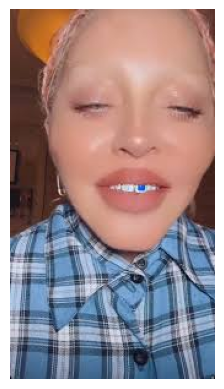

In [73]:
image_path = 'data/madonna.png'
face_embedding= make_embedding(image_full_path)
print(loaded_model.predict(face_embedding))
print(loaded_model.predict_proba(face_embedding))
image= cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

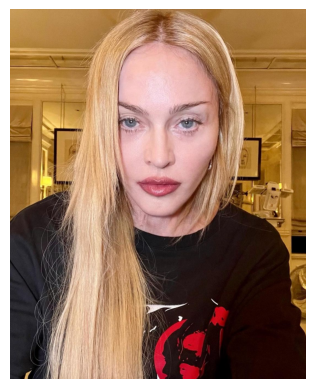

1/1 [==============================] - 2s 2s/step
[[0.02846993 0.04327783 0.03036391 0.86831415 0.02957419]]
madonna


In [81]:
import requests
image_path = 'https://img.vogue.co.kr/vogue/2023/07/style_64accdeee21cd.jpeg'
response = requests.get(image_path)
save_path = 'data/test.jpg'
with open(save_path,'wb') as imageFile:
    imageFile.write(response.content)
image = cv2.imread(save_path,cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()
face_embedding=make_embedding(save_path)
result= loaded_model.predict_proba(face_embedding)
print(result)
names=['ben_afflek','elton_john','jerry_seinfeld','madonna','mindy_kaling']
print(names[result.argmax(axis=1)[0]])